<a href="https://colab.research.google.com/github/Musfiq0/CVPR/blob/main/zero_sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import keras as k
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
num_samples = 10000
matrix_size = 5

def generate_data(num_samples, matrix_size):
    X = np.random.uniform(-1, 1, (num_samples, matrix_size, matrix_size, 1))
    Y1 = np.random.dirichlet(np.ones(matrix_size), num_samples)
    Y2 = np.random.dirichlet(np.ones(matrix_size), num_samples)
    return X, Y1, Y2


X, Y1, Y2 = generate_data(num_samples, matrix_size)

In [13]:
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X, Y1, Y2, test_size=0.2, random_state=42)


In [14]:
def create_cnn(matrix_size):
    input_layer = Input(shape=(matrix_size, matrix_size, 1))


    x = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same')(input_layer)
    x = Activation('relu')(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(1, 1), strides=(2, 2), padding='valid')(x)

    x = Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(1, 1), strides=(2, 2), padding='valid')(x)

    x = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(1, 1), strides=(2, 2), padding='valid')(x)

    x = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(1, 1), strides=(2, 2), padding='valid')(x)

    x = Flatten()(x)

    x = Dense(units=4096)(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    x = Dense(units=4096)(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)


    output_player1 = Dense(matrix_size, activation='softmax', name='player1_output')(x)
    output_player2 = Dense(matrix_size, activation='softmax', name='player2_output')(x)


    model = Model(inputs=input_layer, outputs=[output_player1, output_player2])


    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'categorical_accuracy'])

    return model


model = create_cnn(matrix_size)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 5, 5, 1)]            0         []                            
                                                                                                  
 conv2d_21 (Conv2D)          (None, 5, 5, 64)             640       ['input_4[0][0]']             
                                                                                                  
 activation_24 (Activation)  (None, 5, 5, 64)             0         ['conv2d_21[0][0]']           
                                                                                                  
 conv2d_22 (Conv2D)          (None, 5, 5, 64)             36928     ['activation_24[0][0]']       
                                                                                              

In [15]:
history = model.fit(X_train, [Y1_train, Y2_train], epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
50/50 [==============================] - 11s 37ms/step - loss: 3.2195 - player1_output_loss: 1.6096 - player2_output_loss: 1.6099 - player1_output_accuracy: 0.1986 - player1_output_categorical_accuracy: 0.1986 - player2_output_accuracy: 0.2003 - player2_output_categorical_accuracy: 0.2003 - val_loss: 3.2192 - val_player1_output_loss: 1.6099 - val_player2_output_loss: 1.6093 - val_player1_output_accuracy: 0.2013 - val_player1_output_categorical_accuracy: 0.2013 - val_player2_output_accuracy: 0.2019 - val_player2_output_categorical_accuracy: 0.2019
Epoch 2/50
50/50 [==============================] - 1s 20ms/step - loss: 3.2192 - player1_output_loss: 1.6096 - player2_output_loss: 1.6096 - player1_output_accuracy: 0.1981 - player1_output_categorical_accuracy: 0.1981 - player2_output_accuracy: 0.1956 - player2_output_categorical_accuracy: 0.1956 - val_loss: 3.2194 - val_player1_output_loss: 1.6098 - val_player2_output_loss: 1.6097 - val_player1_output_accuracy: 0.2013 - val_playe

In [16]:
evaluation = model.evaluate(
    X_test,
    {'player1_output': Y1_test, 'player2_output': Y2_test}
)
print(f"Evaluation Results: {evaluation}")


63/63 [==============================] - 1s 9ms/step - loss: 3.2190 - player1_output_loss: 1.6094 - player2_output_loss: 1.6096 - player1_output_accuracy: 0.1985 - player1_output_categorical_accuracy: 0.1985 - player2_output_accuracy: 0.1900 - player2_output_categorical_accuracy: 0.1900
Evaluation Results: [3.219041109085083, 1.6094491481781006, 1.6095919609069824, 0.19850000739097595, 0.19850000739097595, 0.1899999976158142, 0.1899999976158142]


In [17]:
def predict_strategy(model, payoff_matrix):
    payoff_matrix = payoff_matrix.reshape(1, matrix_size, matrix_size, 1)
    player1_strategy, player2_strategy = model.predict(payoff_matrix)
    return player1_strategy[0], player2_strategy[0]

# Example prediction
example_matrix = np.random.uniform(-1, 1, (matrix_size, matrix_size))
player1_strategy, player2_strategy = predict_strategy(model, example_matrix)
print("Player 1 Strategy:", player1_strategy)
print("Player 2 Strategy:", player2_strategy)

1/1 [==============================] - 0s 491ms/step
Player 1 Strategy: [0.20212105 0.19873853 0.2018071  0.19917597 0.19815741]
Player 2 Strategy: [0.1979309  0.20081834 0.1972195  0.20263526 0.20139597]


dict_keys(['loss', 'player1_output_loss', 'player2_output_loss', 'player1_output_accuracy', 'player1_output_categorical_accuracy', 'player2_output_accuracy', 'player2_output_categorical_accuracy', 'val_loss', 'val_player1_output_loss', 'val_player2_output_loss', 'val_player1_output_accuracy', 'val_player1_output_categorical_accuracy', 'val_player2_output_accuracy', 'val_player2_output_categorical_accuracy'])


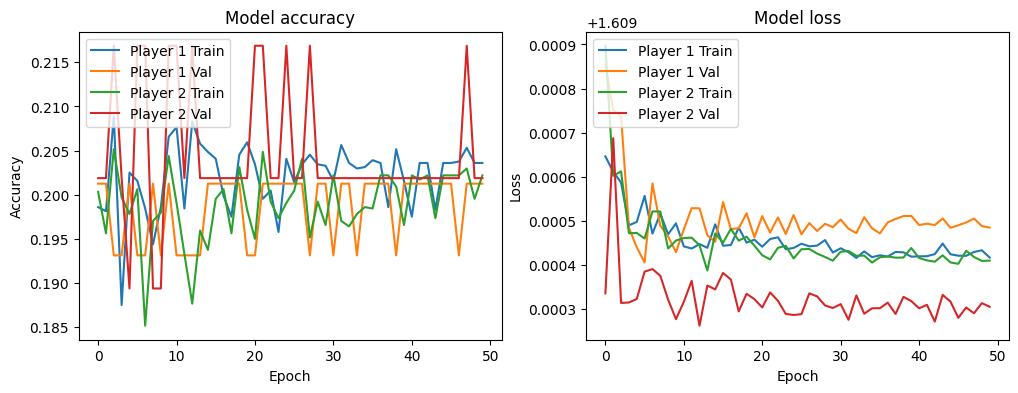

In [18]:

def plot_history(history):
    # Print the keys to check the actual names
    print(history.history.keys())

    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['player1_output_accuracy'])
    plt.plot(history.history['val_player1_output_accuracy'])
    plt.plot(history.history['player2_output_accuracy'])
    plt.plot(history.history['val_player2_output_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Player 1 Train', 'Player 1 Val', 'Player 2 Train', 'Player 2 Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['player1_output_loss'])
    plt.plot(history.history['val_player1_output_loss'])
    plt.plot(history.history['player2_output_loss'])
    plt.plot(history.history['val_player2_output_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Player 1 Train', 'Player 1 Val', 'Player 2 Train', 'Player 2 Val'], loc='upper left')

    plt.show()

plot_history(history)

